## Digit recognition

### import the libraries

In [3]:
import numpy as np
from tensorflow.keras.datasets.mnist import load_data

In [4]:
(X_train, y_train), (X_test, y_test) = load_data()

In [5]:
print(X_train.shape)  # 60000 pictures with 28 x 28 pixels
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [9]:
np.min(X_train), np.max(X_train)

(0, 255)

In [10]:
np.isnan(X_train).sum()

0

In [11]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


### Visualization

In [12]:
import matplotlib.pyplot as plt

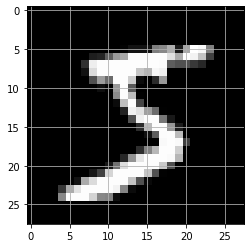

In [13]:
img = X_train[0]
plt.imshow(img, cmap=plt.cm.gray)
# plt.imshow(img, cmap=plt.cm.gray_r)  white background
plt.grid()
plt.show()


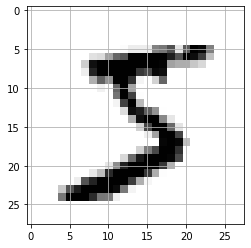

In [14]:
img = X_train[0]
# plt.imshow(img, cmap=plt.cm.gray)
plt.imshow(img, cmap=plt.cm.gray_r) 
plt.grid()
plt.show()

In [15]:
def visual_multi(i):
	nplots = 40  # amount of feature that want to  display
	fig = plt.figure(figsize=(8, 4)) 
	for j in range(nplots):
		plt.subplot(4, 10, j + 1) # 4 Rows x 10 Columns
		plt.imshow(X_train[i+j], cmap=plt.cm.gray)
		plt.title(y_train[i+j],c='w')
		# plt.axis('off')
		plt.xticks([])
		plt.yticks([])
	plt.show()

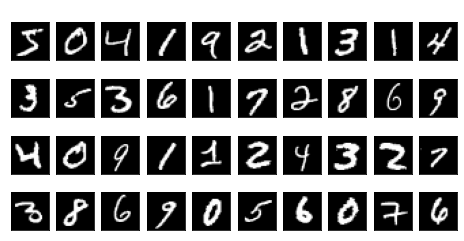

In [16]:
visual_multi(0)

### Prepare for Train & Test

- จัดรูปแบบโครงสร้างจาก 60000 x 28 x 28 ให้เป็น 60000 x 28 x 28 x 1(channel)
- normalize

> convolutional Form => samples x W x W x channel

In [17]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [18]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

# X_train = X_train.reshape((-1, 28, 28, 1))    -1 means remain rows from before
# X_test = X_test.reshape((-1, 28, 28, 1))

In [19]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [20]:
print(X_train)

[[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 ...


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]

#### Normalization

In [21]:
X_train = X_train.astype('float32') / 255.0   # หาร 255 normalize ให้อยู่ 0 - 1
X_test = X_test.astype('float32') / 255.0     

In [22]:
np.min(X_train), np.max(X_train)

(0.0, 1.0)

In [23]:
X_train[0, 10, 10:15, 0]

array([0.00392157, 0.6039216 , 0.99215686, 0.3529412 , 0.        ],
      dtype=float32)

#### Pick 10000 data to train

In [24]:
num_samples = 10000
X_train = X_train[:num_samples]
y_train = y_train[:num_samples]

In [25]:
import warnings

In [26]:
warnings.filterwarnings('ignore')

In [27]:
import seaborn as sns

<AxesSubplot:ylabel='count'>

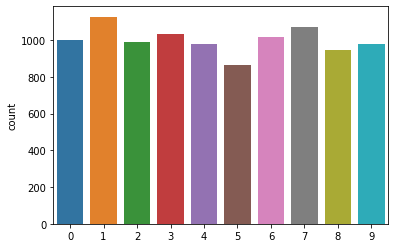

In [28]:
sns.countplot(y_train)

In [29]:
# del sns

<AxesSubplot:ylabel='count'>

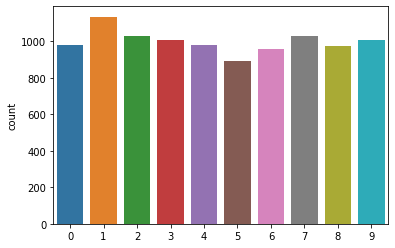

In [30]:
sns.countplot(y_test)

### Create a model

In [31]:
num_classes = len(np.unique(y_train))

In [32]:
num_classes

10

In [33]:
X_train.shape[0:]

(10000, 28, 28, 1)

In [34]:
X_train.shape[1:]

(28, 28, 1)

In [35]:
in_shape = X_train.shape[1:]

In [36]:
in_shape

(28, 28, 1)

#### import the libraries

In [37]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [38]:
model = Sequential()

In [39]:
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=in_shape))
model.add(MaxPool2D(pool_size=(2, 2)))

In [40]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

In [41]:
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=num_classes, activation='softmax'))

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [43]:
from tensorflow.keras.utils import plot_model

In [44]:
plot_model(model, 'digit.png', show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [45]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [46]:
import time
start = time.time()
history = model.fit(X_train, y_train, epochs=15, batch_size=128, verbose=1, validation_split=0.1)
end = time.time()
print("Time taken: {:.2f} minutes".format((end-start)/60))

Epoch 1/15
71/71 [==============================] - 3s 33ms/step - loss: 1.1140 - accuracy: 0.6389 - val_loss: 0.2846 - val_accuracy: 0.9170
Epoch 2/15
71/71 [==============================] - 2s 31ms/step - loss: 0.3464 - accuracy: 0.8949 - val_loss: 0.1764 - val_accuracy: 0.9470
Epoch 3/15
71/71 [==============================] - 2s 31ms/step - loss: 0.2480 - accuracy: 0.9261 - val_loss: 0.1220 - val_accuracy: 0.9640
Epoch 4/15
71/71 [==============================] - 3s 36ms/step - loss: 0.1808 - accuracy: 0.9454 - val_loss: 0.1064 - val_accuracy: 0.9690
Epoch 5/15
71/71 [==============================] - 3s 36ms/step - loss: 0.1701 - accuracy: 0.9481 - val_loss: 0.0933 - val_accuracy: 0.9720
Epoch 6/15
71/71 [==============================] - 2s 34ms/step - loss: 0.1436 - accuracy: 0.9561 - val_loss: 0.0813 - val_accuracy: 0.9770
Epoch 7/15
71/71 [==============================] - 2s 35ms/step - loss: 0.1262 - accuracy: 0.9624 - val_loss: 0.0750 - val_accuracy: 0.9810
Epoch 8/15
71

In [47]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: {:.3f}".format(score[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.0453 - accuracy: 0.9843
Accuracy: 0.984


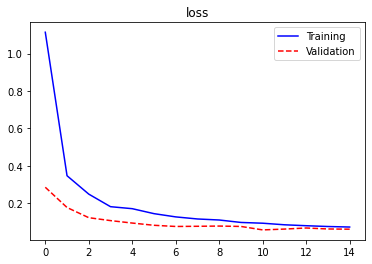

In [48]:
plt.plot(history.history['loss'], color='b', label='Training')
plt.plot(history.history['val_loss'], 'r--', label='Validation')
plt.title('loss')
plt.legend()
plt.show()

In [49]:
y_pred = model.predict(X_test)
y_pred_cls = np.argmax(y_pred, axis=1)

In [50]:
y_pred_cls

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [51]:
idx_miss = np.where(y_pred_cls != y_test)

In [52]:
print(len(idx_miss[0]))

157


In [53]:
y_test[idx_miss][:15]

array([4, 2, 6, 3, 8, 7, 0, 5, 4, 7, 8, 9, 2, 3, 8], dtype=uint8)

In [54]:
y_pred_cls[idx_miss][:15]

array([2, 7, 0, 5, 2, 3, 6, 8, 9, 2, 7, 7, 7, 5, 9], dtype=int64)

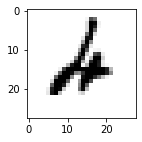

In [55]:
fig = plt.figure(figsize=(2,2))
# hence feature was reshaped and it has to reshape to 28 x 28 
plt.imshow(X_test[idx_miss][0].reshape(28, 28), cmap=plt.cm.gray_r)
plt.show()

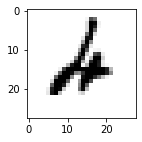

In [56]:
fig = plt.figure(figsize=(2,2))
# hence feature was reshaped and it has to reshape to 28 x 28 
plt.imshow(X_test[idx_miss][0].reshape(28, 28), cmap=plt.cm.gray_r)
plt.show()

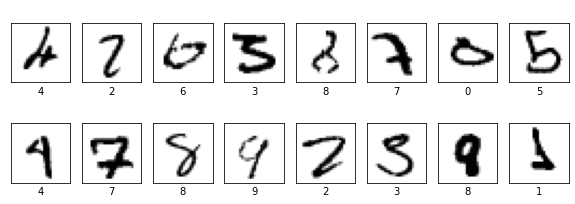

In [57]:
nplots = 16
fig = plt.figure(figsize=(10,3.4))
for j,k in enumerate(idx_miss[0]):
	plt.subplot(2, 8, j + 1)
	plt.imshow(X_test[k].reshape(28, 28), cmap=plt.cm.gray_r)
	plt.title('p--> {}'.format(y_pred_cls[k]), c='w')
	plt.xticks([])
	plt.yticks([])
	plt.xlabel(y_test[k])
	if j >= nplots-1:
		break
plt.show()

### Using real write from Paint digit

In [58]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.image import rgb_to_grayscale
from PIL import ImageOps

In [59]:
# file size to predict use as input
img = load_img('digit1.png', target_size=(28,28))

In [60]:
img

In [61]:
img = ImageOps.invert(img)  # revert white < -- > black
img

In [62]:
img = img_to_array(img)

In [63]:
img

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [64]:
print('shape=', img.shape)

shape= (28, 28, 3)


In [65]:
img = rgb_to_grayscale(img)

In [66]:
print('shape=', img.shape)

shape= (28, 28, 1)


In [67]:
print('max pixel value=', np.max(img))

max pixel value= 254.97452


In [68]:
img = img / 255.0
print('max pixel value=', np.max(img))

max pixel value= 0.99990004


In [69]:
img = np.expand_dims(img, axis=0) # จัดให้อยู่ในรูปแบบ batch_size ,w, h, channel

In [70]:
img.shape

(1, 28, 28, 1)

In [71]:
y_pred = model.predict(img)

In [72]:
y_pred

array([[5.7740160e-03, 9.0334284e-01, 1.2618022e-02, 4.2319790e-04,
        4.3839872e-02, 1.3906688e-03, 2.0172350e-02, 5.4869968e-03,
        6.0253730e-03, 9.2663069e-04]], dtype=float32)

In [73]:
y_pred.round(3)

array([[0.006, 0.903, 0.013, 0.   , 0.044, 0.001, 0.02 , 0.005, 0.006,
        0.001]], dtype=float32)

In [74]:
predicted = np.argmax(y_pred, -1)  # -1 == axis =1
print(predicted)

[1]


([], [])

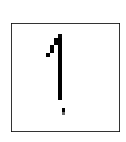

In [75]:
plt.figure(figsize=(2, 2)) 
plt.imshow(img[0], cmap=plt.cm.gray_r)
plt.title('Predicted:{}'.format(predicted[0]), c='w')
plt.xticks([])
plt.yticks([])

In [76]:
def predict_digit(imgs):
	y_pred = []
	y_pred_cls = []
	img_lst = []

	for i in imgs:
		img = load_img(i, target_size=(28, 28))
		img = ImageOps.invert(img)
		img = img_to_array(img)
		img = rgb_to_grayscale(img)
		img = img / 255.0
		img_lst.append(img)

		img = np.expand_dims(img, axis=0)
		y_pred_i = model.predict(img)
		y_pred_cls_i = np.argmax(y_pred_i, -1)
		y_pred.append(y_pred_i)
		y_pred_cls.append(y_pred_cls_i)
	return img_lst, y_pred_cls, y_pred

In [77]:
imgFiles = ['digit0.png','digit1.png','digit2.png','digit3.png','digit4.png','digit5.png','digit6.png','digit7.png','digit8.png','digit9.png']

In [78]:
img_lst, y_pred_cls, y_pred = predict_digit(imgFiles)

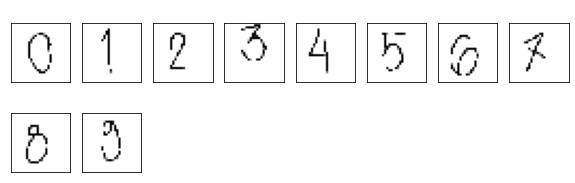

In [79]:
fig = plt.figure(figsize=(10, 4.7))
for i, k in enumerate(img_lst):
	plt.subplot(3, 8, i + 1)
	plt.imshow(k, cmap=plt.cm.gray_r)
	plt.title('p--> {}'.format(y_pred_cls[i][0]), c='w')
	plt.yticks([])
	plt.xticks([])
plt.show()

In [81]:
model.save('./digit_model.h5')